### Домашнее задание 
### Урок 1. Кейс 1. EDA по Hourly Energy Consumption и Brent

### 1. Выберите наборы данных. которые можно интерпретировать, как временные ряды:

а) зависимость цены на недвижимость в конкретном регионе от времени    - да.

б) скорость полета самолета при перелете из аэропорта А в аэропорт В   - да

в) количество отказов компьютера                                       - нет

г) число обращений в поликлинику по району                             - нет

д) координаты автобуса при движении по маршруту                        - да

е) координаты фигуры нарушителя в файле видеофиксации охранной системы - да, при отслеживании нарушителя в течение какого-то времени

### 2. Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns

In [2]:
data_duq = pd.read_csv('DUQ_hourly.csv', index_col=[0], parse_dates=[0])
data_duq.head()

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0


#### 1). определим тип и размерность данных

In [3]:
data_duq.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
DUQ_MW    119068 non-null float64
dtypes: float64(1)
memory usage: 1.8 MB


#### 2). построим визуализацию для отслеживания аномалий

Text(0, 0.5, 'МВт')

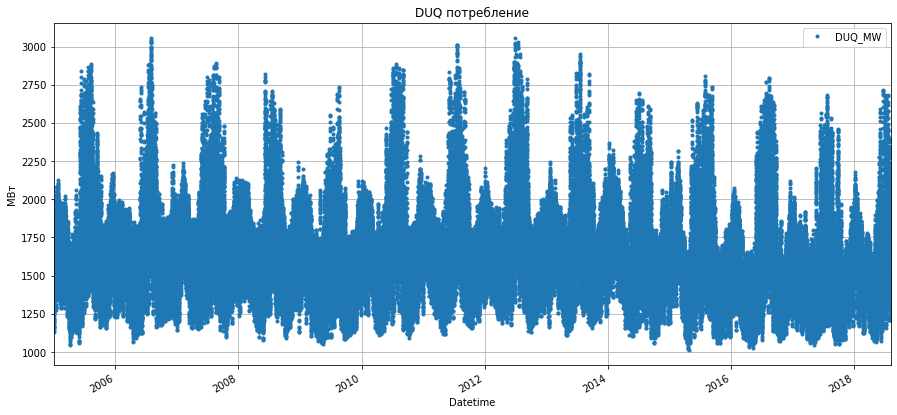

In [4]:
data_duq.plot( style = '.', figsize = ( 15, 7 ), title = 'DUQ потребление', grid=True)
plt.ylabel ( 'МВт' )

#### 3). определим пропуски в данных:  
добавим служебную колонку 'date'

In [5]:
data_duq['date'] = data_duq.index
data_duq.head()

,DUQ_MW,date
Datetime,,
2005-12-31 01:00:00,1458.0,2005-12-31 01:00:00
2005-12-31 02:00:00,1377.0,2005-12-31 02:00:00
2005-12-31 03:00:00,1351.0,2005-12-31 03:00:00
2005-12-31 04:00:00,1336.0,2005-12-31 04:00:00
2005-12-31 05:00:00,1356.0,2005-12-31 05:00:00


В материалах урока высказывалась гипотеза, что имеет место переход с зимнего на летнее время и обратно. Следовательно, осенью должны быть дубликаты, а весной должны быть пропуски в данных. Определим их.  
Обычно переход на летнее время делается во второе воскресенье марта (ночь с субботы на воскресенье), следовательно, пропуски должны гарантированно находиться в первые 15 дней марта:

In [6]:
day_march = data_duq['2014-03-01 00:00:00':'2014-03-15 23:00:00'].index.day
day_count = day_march.value_counts() 
d2014 = day_count[day_count != 24].index
d2014

Int64Index([9], dtype='int64')

In [7]:
day_march = data_duq['2015-03-01 00:00:00':'2015-03-15 23:00:00'].index.day
day_count = day_march.value_counts() 
d2015 = day_count[day_count != 24].index
d2015

Int64Index([8], dtype='int64')

In [8]:
day_march = data_duq['2016-03-01 00:00:00':'2016-03-15 23:00:00'].index.day
day_count = day_march.value_counts() 
d2016 = day_count[day_count != 24].index
d2016

Int64Index([13], dtype='int64')

In [9]:
day_march = data_duq['2017-03-01 00:00:00':'2017-03-15 23:00:00'].index.day
day_count = day_march.value_counts() 
d2017 = day_count[day_count != 24].index
d2017

Int64Index([12], dtype='int64')

посмотрим отдельно на день 

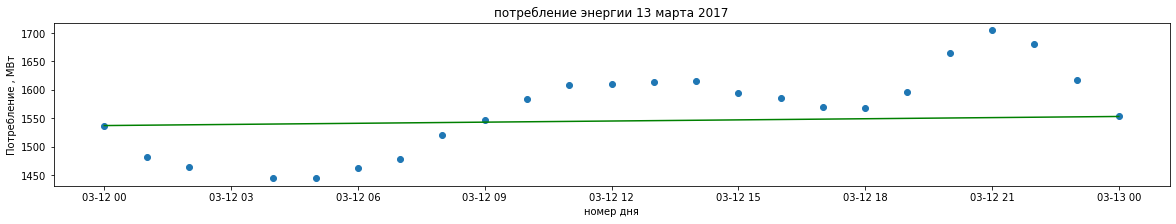

In [10]:
plt.figure(figsize=(20,3))
plt.plot(data_duq['2017-03-12 00:00:00':'2017-03-13 00:00:00'].index,data_duq['2017-03-12 00:00:00':'2017-03-13 00:00:00']['DUQ_MW'].values, 'o')

line_ = pd.to_datetime(pd.Series(['2017-03-12 00:00:00','2017-03-13 00:00:00']))
plt.plot(line_,np.array([1537,1553]),'g')

plt.xlabel('номер дня')
plt.ylabel('Потребление , МВт')
plt.title('потребление энергии 13 марта 2017')

plt.show()

видим, что имеется пробел 03.12.2017 в 03 часа

заполним подобные пробелы средними арифметическими между соседними значениями:   
рассчитаем эти значения

In [11]:
v2014 = list((data_duq['2014-03-09 02:00:00']['DUQ_MW'].values + data_duq['2014-03-09 04:00:00']['DUQ_MW'].values) / 2)
v2015 = list((data_duq['2015-03-08 02:00:00']['DUQ_MW'].values + data_duq['2015-03-08 04:00:00']['DUQ_MW'].values) / 2)
v2016 = list((data_duq['2016-03-13 02:00:00']['DUQ_MW'].values + data_duq['2016-03-13 04:00:00']['DUQ_MW'].values) / 2)
v2017 = list((data_duq['2017-03-12 02:00:00']['DUQ_MW'].values + data_duq['2017-03-12 04:00:00']['DUQ_MW'].values) / 2)
v =np.reshape([v2014[0],v2015[0],v2016[0],v2017[0]],(4,1))
v

array([[1415. ],
       [1394.5],
       [1111.5],
       [1454. ]])

создадим датафрейм из этих значений:

In [12]:
df_data = pd.DataFrame(index = pd.to_datetime(pd.Series(['2014-03-09 03:00:00','2015-03-08 03:00:00','2016-03-13 03:00:00','2017-03-12 03:00:00'])), columns =['DUQ_MW'] , data = v) 
df_data['date'] = df_data.index
df_data

,DUQ_MW,date
2014-03-09 03:00:00,1415.0,2014-03-09 03:00:00
2015-03-08 03:00:00,1394.5,2015-03-08 03:00:00
2016-03-13 03:00:00,1111.5,2016-03-13 03:00:00
2017-03-12 03:00:00,1454.0,2017-03-12 03:00:00


добавим их к исходному датафрейму:

In [13]:
data_duq = data_duq.append(df_data,sort = False)
data_duq.tail(4)

,DUQ_MW,date
2014-03-09 03:00:00,1415.0,2014-03-09 03:00:00
2015-03-08 03:00:00,1394.5,2015-03-08 03:00:00
2016-03-13 03:00:00,1111.5,2016-03-13 03:00:00
2017-03-12 03:00:00,1454.0,2017-03-12 03:00:00


Посмотрим опять на наш пример:

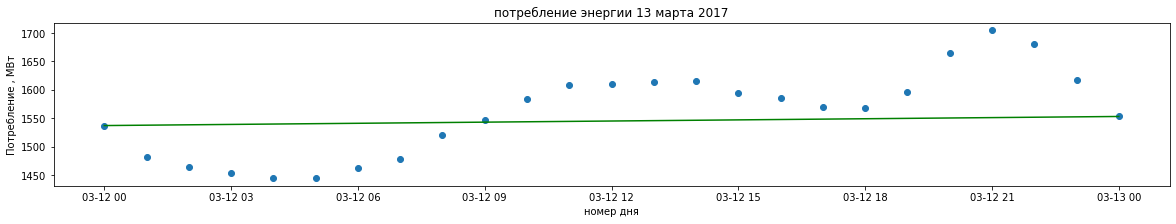

In [14]:
plt.figure(figsize=(20,3))
plt.plot(data_duq['2017-03-12 00:00:00':'2017-03-13 00:00:00'].index,data_duq['2017-03-12 00:00:00':'2017-03-13 00:00:00']['DUQ_MW'].values, 'o')

line_ = pd.to_datetime(pd.Series(['2017-03-12 00:00:00','2017-03-13 00:00:00']))
plt.plot(line_,np.array([1537,1553]),'g')

plt.xlabel('номер дня')
plt.ylabel('Потребление , МВт')
plt.title('потребление энергии 13 марта 2017')

plt.show()

пробелов больше нет

#### 4). Определим дубликаты в данных:   
сравним число уникальных индексов 

In [15]:
ut = data_duq['date'].unique()
print('число уникальных значений:   ',ut.shape[0],' : число наблюдений : ', data_duq.shape[0])

число уникальных значений:    119068  : число наблюдений :  119072


4 значения индекса и колонки 'date' у нас повторяются. Определим эти значения:

In [16]:
count_data = data_duq['date'].value_counts()
count_data.head()

2017-11-05 02:00:00    2
2014-11-02 02:00:00    2
2015-11-01 02:00:00    2
2016-11-06 02:00:00    2
2007-07-15 10:00:00    1
Name: date, dtype: int64

Убедимся, что данные в дуплицированных колонках различны:

In [17]:
data_duq['2017-11-05 02:00:00'].values

array([[1131.0, Timestamp('2017-11-05 02:00:00')],
       [1105.0, Timestamp('2017-11-05 02:00:00')]], dtype=object)

Сформируем новый датафрейм из дублированных индексов и средних значений из из данных.   
Всего у нас 4 дублированных индекса.

In [18]:
df = data_duq.loc[count_data.iloc[:4].index]
print(df)

df_ = df.groupby('date').mean()
df_['date'] = df_.index
print(df_)

print(data_duq.shape)

                     DUQ_MW                date
2017-11-05 02:00:00  1131.0 2017-11-05 02:00:00
2017-11-05 02:00:00  1105.0 2017-11-05 02:00:00
2014-11-02 02:00:00  1272.0 2014-11-02 02:00:00
2014-11-02 02:00:00  1240.0 2014-11-02 02:00:00
2015-11-01 02:00:00  1113.0 2015-11-01 02:00:00
2015-11-01 02:00:00  1138.0 2015-11-01 02:00:00
2016-11-06 02:00:00  1121.0 2016-11-06 02:00:00
2016-11-06 02:00:00  1107.0 2016-11-06 02:00:00
                     DUQ_MW                date
date                                           
2014-11-02 02:00:00  1256.0 2014-11-02 02:00:00
2015-11-01 02:00:00  1125.5 2015-11-01 02:00:00
2016-11-06 02:00:00  1114.0 2016-11-06 02:00:00
2017-11-05 02:00:00  1118.0 2017-11-05 02:00:00
(119072, 2)


удалим дубликаты:

In [19]:
data_duq = data_duq.drop(count_data.iloc[:4].index)
print(data_duq.shape)

(119064, 2)


In [20]:
data_duq = data_duq.append(df_,sort = False)
data_duq.tail()

,DUQ_MW,date
2017-03-12 03:00:00,1454.0,2017-03-12 03:00:00
2014-11-02 02:00:00,1256.0,2014-11-02 02:00:00
2015-11-01 02:00:00,1125.5,2015-11-01 02:00:00
2016-11-06 02:00:00,1114.0,2016-11-06 02:00:00
2017-11-05 02:00:00,1118.0,2017-11-05 02:00:00


In [21]:
print(data_duq.shape)

(119068, 2)


Отсортируем датафрейм:

In [22]:
data_duq=data_duq.sort_index

#### Вывод:   
общий объем данных - 119068 строк   
null значений нет   
данные с 01:00 31.12.2005 по 00:00 02.01.2018   
тип значений - float64 

индексы отсутствующих данных:   
2014-03-09 03:00:00   
2015-03-08 03:00:00   
2016-03-13 03:00:00   
2017-03-12 03:00:00   
заполнены средними значениями соседей   

индексы дубликатов:   
2014-11-02 02:00:00   
2015-11-01 02:00:00   
2016-11-06 02:00:00   
2017-11-05 02:00:00   
заполнены собственными средними значениями   

пробелы и дубликаты вызваны смещением временной шкалы при переходе с зимнего времени на летнее и обратно

### 3. Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам . Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent. (одна группа на интервале - одно значение std или mean, т.е. если было 28 деней, то 9 значений для ресемплинга на 3 дня, 4 значения при ресемплинге неделя и 2 значения при ресемплинге 2 недели )

#### Оригинальные данные Brent:

In [23]:
brent_data = pd.read_excel('нефть-brent 2010-2019.xlsx', index_col=[0], parse_dates=[0])
brent_data.head()

,Значение
Дата,
2019-09-01,58.84
2019-08-30,59.19
2019-08-29,60.37
2019-08-28,59.84
2019-08-27,59.59


Text(0, 0.5, '$ usa')

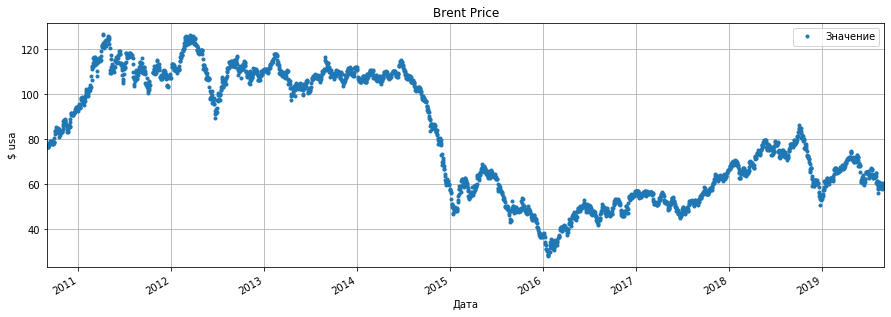

In [24]:
brent_data.plot( style = '.', figsize = ( 15, 5), title = 'Brent Price', grid=True, label='day_value')
plt.ylabel ( '$ usa' )

#### Среднее значение по неделям:

In [25]:
brent_data.resample("W").mean().head()

,Значение
Дата,
2010-09-05,76.616000
2010-09-12,77.673333
2010-09-19,78.693333
2010-09-26,78.518333
2010-10-03,81.211667


Text(0, 0.5, '$ usa')

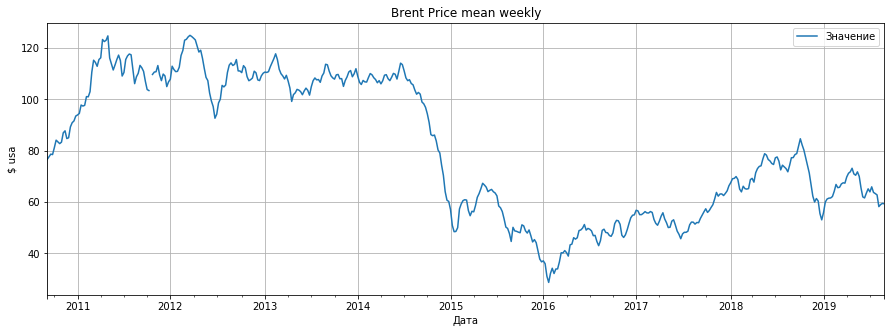

In [26]:
brent_data.resample("W").mean().plot( style = '-', figsize = ( 15, 5 ), title = 'Brent Price mean weekly', grid=True )
plt.ylabel ( '$ usa' )

#### Стандартное отклонение по неделям:

In [27]:
brent_data.resample("W").std().head()

,Значение
Дата,
2010-09-05,0.185688
2010-09-12,0.649759
2010-09-19,0.539728
2010-09-26,0.596068
2010-10-03,2.408588


Text(0, 0.5, '$ usa')

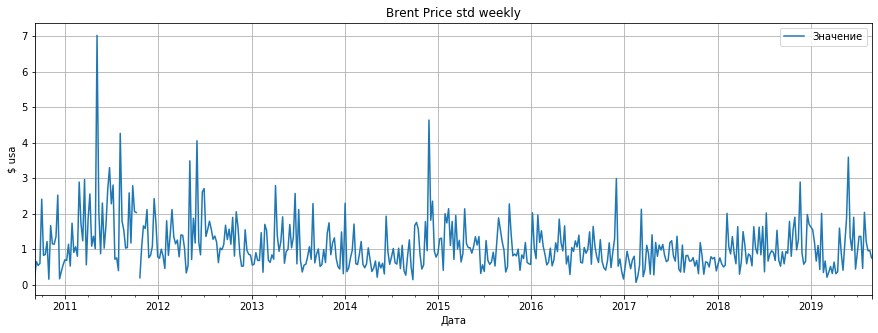

In [28]:
brent_data.resample("W").std().plot( style = '-', figsize = ( 15, 5), title = 'Brent Price std weekly', grid=True )
plt.ylabel ( '$ usa' )

#### Среднее значение по месяцам:

In [29]:
brent_data.resample("M").mean().head()

,Значение
Дата,
2010-09-30,78.228148
2010-10-31,83.473462
2010-11-30,86.178077
2010-12-31,92.232308
2011-01-31,97.033200


Text(0, 0.5, '$ usa')

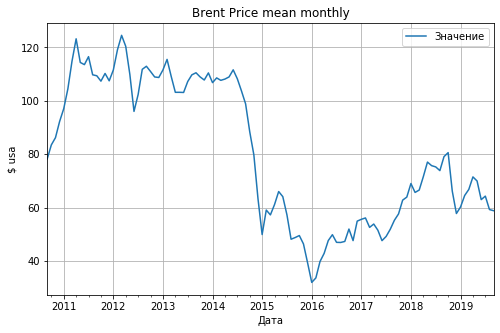

In [30]:
brent_data.resample("M").mean().plot( style = '-', figsize = ( 8, 5 ), title = 'Brent Price mean monthly', grid=True )
plt.ylabel ( '$ usa' )

#### Стандартное отклонение по месяцам:

In [31]:
brent_data.resample("M").std().head()

,Значение
Дата,
2010-09-30,1.294269
2010-10-31,0.898559
2010-11-30,1.753625
2010-12-31,1.443311
2011-01-31,1.842147


Text(0, 0.5, '$ usa')

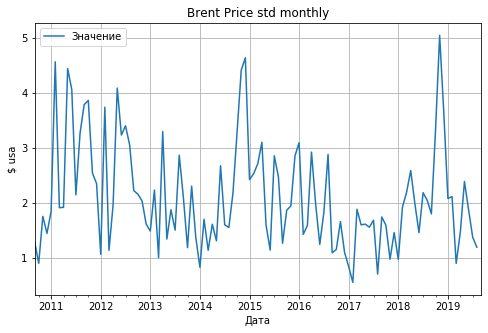

In [32]:
brent_data.resample("M").std().plot( style = '-', figsize = ( 8, 5 ), title = 'Brent Price std monthly', grid=True )
plt.ylabel ( '$ usa' )

#### Среднее значение по годам:

In [33]:
brent_data.resample("Y").mean().head()

,Значение
Дата,
2010-12-31,84.963238
2011-12-31,110.758746
2012-12-31,111.377484
2013-12-31,108.137114
2014-12-31,99.435493


Text(0, 0.5, '$ usa')

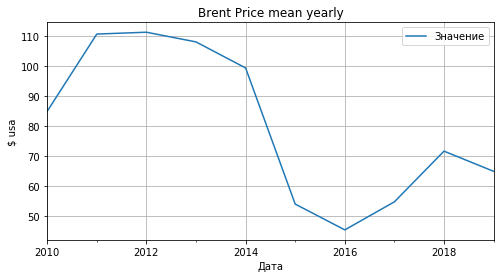

In [34]:
brent_data.resample("Y").mean().plot( style = '-', figsize = ( 8, 4 ), title = 'Brent Price mean yearly', grid=True )
plt.ylabel ( '$ usa' )

#### Стандартное отклонение по годам:

In [35]:
brent_data.resample("Y").std().head()

,Значение
Дата,
2010-12-31,5.269065
2011-12-31,7.021114
2012-12-31,7.777702
2013-12-31,4.014836
2014-12-31,14.512923


Text(0, 0.5, '$ usa')

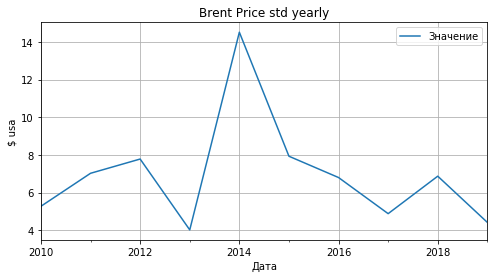

In [36]:
brent_data.resample("Y").std().plot( style = '-', figsize = ( 8, 4 ), title = 'Brent Price std yearly', grid=True )
plt.ylabel ( '$ usa' )

### 4. Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с годовыми и исходными дневными

В исходных дневных графиках:   
2011 - резкий рост, далее небольшое снижение с колебаниями   
2012 - колебания цены более чем на 30 % от максимума, и стабилизация к концу года   
2013 - изменение цены в пределах 100-120 и стабилизация к концу года   
2014 - первая половина года стабильна, далее падение цены до 50 за баррель и ниже   
2015 - первая половина года - небольшой рост, далее падение цены до 20 за баррель  
2016 - рост   
2017 - рост   
2018 - рост до 87, во второй половине года - падение до 50   
2019 - рост

Поведение средней цены на недельных и месячных графиках соответствует оригинальным данным. На годовом графике отражены лишь трендовые колебания.

Поведение среднего стандартного отклонения в недельных, месячных и годовых графиках совпадает только в те периоды, когда был наибольший перепад значений цены: 2012, 2014 и 2016 гг.